### Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

### Loading Data

- **Reading CSV File:** reading a csv file into a dataframe named `df`, which is used for data analysis and manipulation.


In [4]:
df = pd.read_csv(r'D:\Python\Files\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
486938,Data Engineer,Principal Data Engineer,"Azle, TX",via Melga,Full-time,False,Sudan,2023-02-12 12:23:23,False,False,Sudan,NaN,NaN,NaN,Fidelity Investments,"['oracle', 'aws', 'jira']","{'async': ['jira'], 'cloud': ['oracle', 'aws']}"
749805,Data Scientist,Data Scientist,"Porto, Portugal",via Indeed,Full-time,False,Portugal,2023-04-02 20:16:43,False,False,Portugal,NaN,NaN,NaN,Damia,NaN,NaN


### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [5]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt']) 
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg) 
#df.dropna(subset=['salyr'],inplace=True)

### Sample

- Random sample of 2 rows from the modified dataFrame `df`

In [6]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
416885,Data Analyst,"Analyst, Data Analysis","Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-05-02 17:01:25,False,False,Malaysia,NaN,NaN,NaN,Standard Chartered Bank,"[r, sas, sas, python, sql, vba, oracle, hadoop...","{'analyst_tools': ['sas', 'tableau', 'alteryx'..."
126175,Data Engineer,Senior Technical Lead - Data Engineer,Singapore,via Jooble,Full-time,False,Singapore,2023-08-23 08:19:23,True,False,Singapore,NaN,NaN,NaN,HCL Singapore Pte Ltd,"[shell, sql, python, scala, java, aws, azure, ...","{'analyst_tools': ['ssis', 'ssrs', 'power bi']..."


### Extracting Month 

- extracting the month from the `posted_dt` column and creating a new column `posted_mo` in the dataframe with this month information.

In [7]:
df['posted_mo'] = df['posted_dt'].dt.month
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype,posted_mo
696245,Senior Data Engineer,Senior DevOps Engineer (Big Data),Armenia,via The Muse,Full-time,False,Armenia,2023-04-07 10:53:01,True,False,Armenia,NaN,NaN,NaN,EPAM Systems,"[cassandra, aws, hadoop, spark, linux, puppet,...","{'cloud': ['aws'], 'databases': ['cassandra'],...",4
40790,Data Engineer,Data Engineer (Data Modeling),United States,via Indeed,Full-time,False,"Florida, United States",2023-07-10 06:08:51,True,False,United States,NaN,NaN,NaN,ACL Technology,"[python, r, aws, azure, flow]","{'cloud': ['aws', 'azure'], 'other': ['flow'],...",7


### Grouping and Counting 

- grouping the dataframe by the `posted_mo` column and calculating the size of each group. converting the result to a dataframe named `plot` where the index is `posted_mo` and the values represent the count of jobs for each month.

In [8]:
plot = df.groupby('posted_mo')['job'].agg('size').to_frame()
plot

,job
posted_mo,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


### Filtering and Copying 

- creating a new dataframe `df_ind` by filtering the original dataframe to include only rows where the `country` column is `'India'`. making a copy of the filtered dataframe to avoid modifying the original dataframe.

In [9]:
df_ind = df[df['country']== 'India'].copy()

### Grouping and Aggregating 

-  grouping the `df_ind` dataframe by the `posted_mo` column and calculating the size of each group. the result is converted to a dataframe named `plot_ind` where the index is `posted_mo` and the values represent the count of jobs posted in india for each month.

In [10]:
plot_ind = df_ind.groupby('posted_mo')['job'].agg('size').to_frame()
plot_ind

,job
posted_mo,
1,5516
2,3945
3,4026
4,4010
5,3267
6,4197
7,4122
8,4295
9,4114


### Plotting

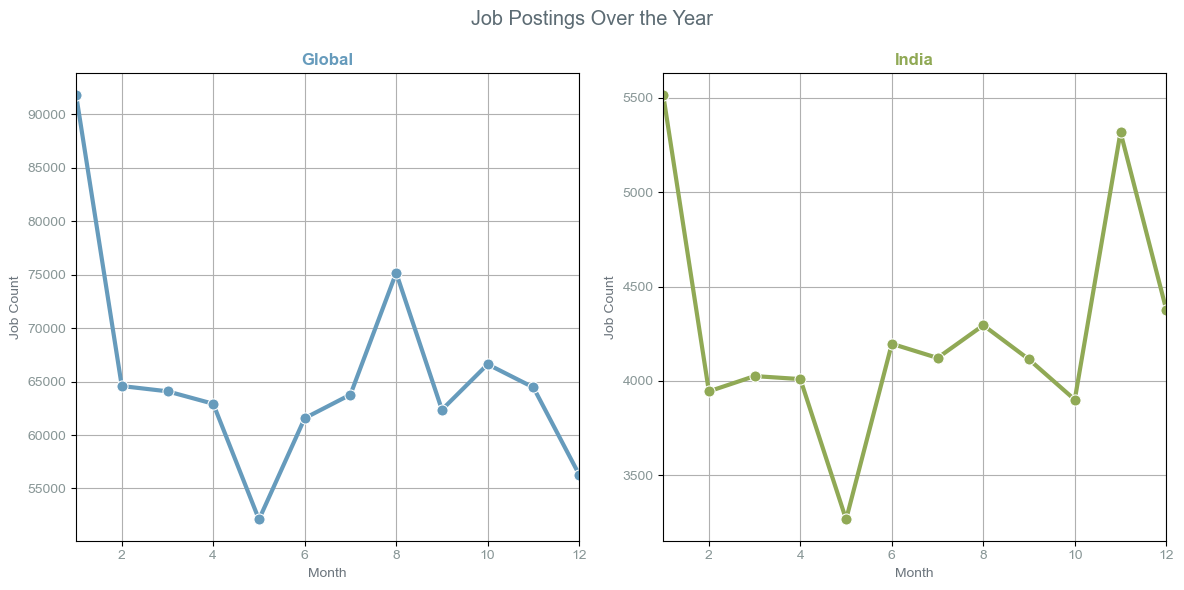

In [11]:
# Setting Up for Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.set_theme(style='ticks')

# Creating Plot
sns.lineplot(data=plot,     x='posted_mo', y='job', ax=ax[0], color= '#669bbc', linewidth=3, marker= 'o', markersize = 8)
sns.lineplot(data=plot_ind, x='posted_mo', y='job', ax=ax[1], color= '#90a955', linewidth=3, marker= 'o', markersize = 8)

# Modifying Axes and Labels
ax[0].set_title('Global', color =  '#669bbc', fontweight='bold')
ax[1].set_title('India',    color= '#90a955', fontweight='bold')

ax[0].set_xlabel('Month',     color = '#6c757d')
ax[0].set_ylabel('Job Count', color = '#6c757d')
ax[1].set_xlabel('Month',     color = '#6c757d')
ax[1].set_ylabel('Job Count', color = '#6c757d')

ax[0].set_xlim(1, 12)
ax[1].set_xlim(1, 12)

ax[0].tick_params(axis='x', labelcolor='#889696') 
ax[0].tick_params(axis='y', labelcolor='#889696')
ax[1].tick_params(axis='x', labelcolor='#889696') 
ax[1].tick_params(axis='y', labelcolor='#889696')

ax[0].grid(True)
ax[1].grid(True)

# Modifying the entire figure
plt.suptitle('Job Postings Over the Year', color = '#5c6b73')


# Displaying the Plot
plt.tight_layout()
plt.show()


<span style="color:#d7ba7d; font-size:50px;"> End </span>

---